In [322]:
import pandas as pd

df = pd.read_csv( "pokemon.csv", header = 0)
df

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,Ivysaur,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,Venusaur,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,Charmander,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,Charmeleon,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Celesteela,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,Kartana,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,Guzzlord,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,Necrozma,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [323]:
from sklearn.model_selection import train_test_split
against_columns = [col for col in df.columns if col.startswith('against_')]
x = df[against_columns]
y = df['type1']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.33)


In [324]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha=.01)
clf = clf.fit(x_train, y_train)



In [325]:

y_test

507    normal
572    normal
247      rock
449    ground
681     fairy
        ...  
631       bug
730    normal
553      fire
253     grass
314     grass
Name: type1, Length: 265, dtype: object

In [326]:
predictions = clf.predict(x_test)
predictions

array(['normal', 'normal', 'rock', 'ground', 'fairy', 'dragon', 'dark',
       'bug', 'fighting', 'normal', 'ghost', 'ice', 'fairy', 'bug',
       'fire', 'normal', 'bug', 'psychic', 'fire', 'bug', 'rock', 'rock',
       'steel', 'rock', 'water', 'grass', 'ice', 'fire', 'water', 'water',
       'ghost', 'dark', 'grass', 'steel', 'rock', 'normal', 'grass',
       'poison', 'electric', 'fairy', 'ground', 'water', 'ghost', 'grass',
       'normal', 'water', 'water', 'grass', 'bug', 'normal', 'dragon',
       'dragon', 'bug', 'water', 'normal', 'dragon', 'normal', 'water',
       'normal', 'grass', 'fire', 'poison', 'psychic', 'fighting',
       'grass', 'ice', 'psychic', 'water', 'normal', 'grass', 'fighting',
       'rock', 'rock', 'ice', 'ground', 'rock', 'normal', 'rock', 'grass',
       'normal', 'fairy', 'ice', 'normal', 'normal', 'ice', 'normal',
       'bug', 'water', 'steel', 'bug', 'ghost', 'bug', 'electric',
       'ground', 'water', 'fighting', 'dragon', 'normal', 'dark',
     

In [327]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)


0.8603773584905661

In [328]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water']
)

array([[21,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1,
         1,  1],
       [ 0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         2,  0],
       [ 0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,
         0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  1,  1,
         0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  1, 24,  0,  0,  0,  0,  2,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  4,
         0,  1],
       [ 0,  0,  0,  

In [329]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water']))

              precision    recall  f1-score   support

         bug       0.88      0.81      0.84        26
        dark       1.00      0.80      0.89        10
      dragon       0.88      0.78      0.82         9
    electric       1.00      1.00      1.00        10
       fairy       1.00      1.00      1.00        10
    fighting       1.00      1.00      1.00         9
        fire       0.86      0.90      0.88        20
      flying       0.00      0.00      0.00         1
       ghost       0.70      1.00      0.82         7
       grass       1.00      0.83      0.91        29
      ground       1.00      0.62      0.76        13
         ice       0.67      0.86      0.75         7
      normal       1.00      1.00      1.00        37
      poison       0.73      0.57      0.64        14
     psychic       0.73      0.92      0.81        12
        rock       0.60      0.92      0.73        13
       steel       0.50      1.00      0.67         4
       water       0.85    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


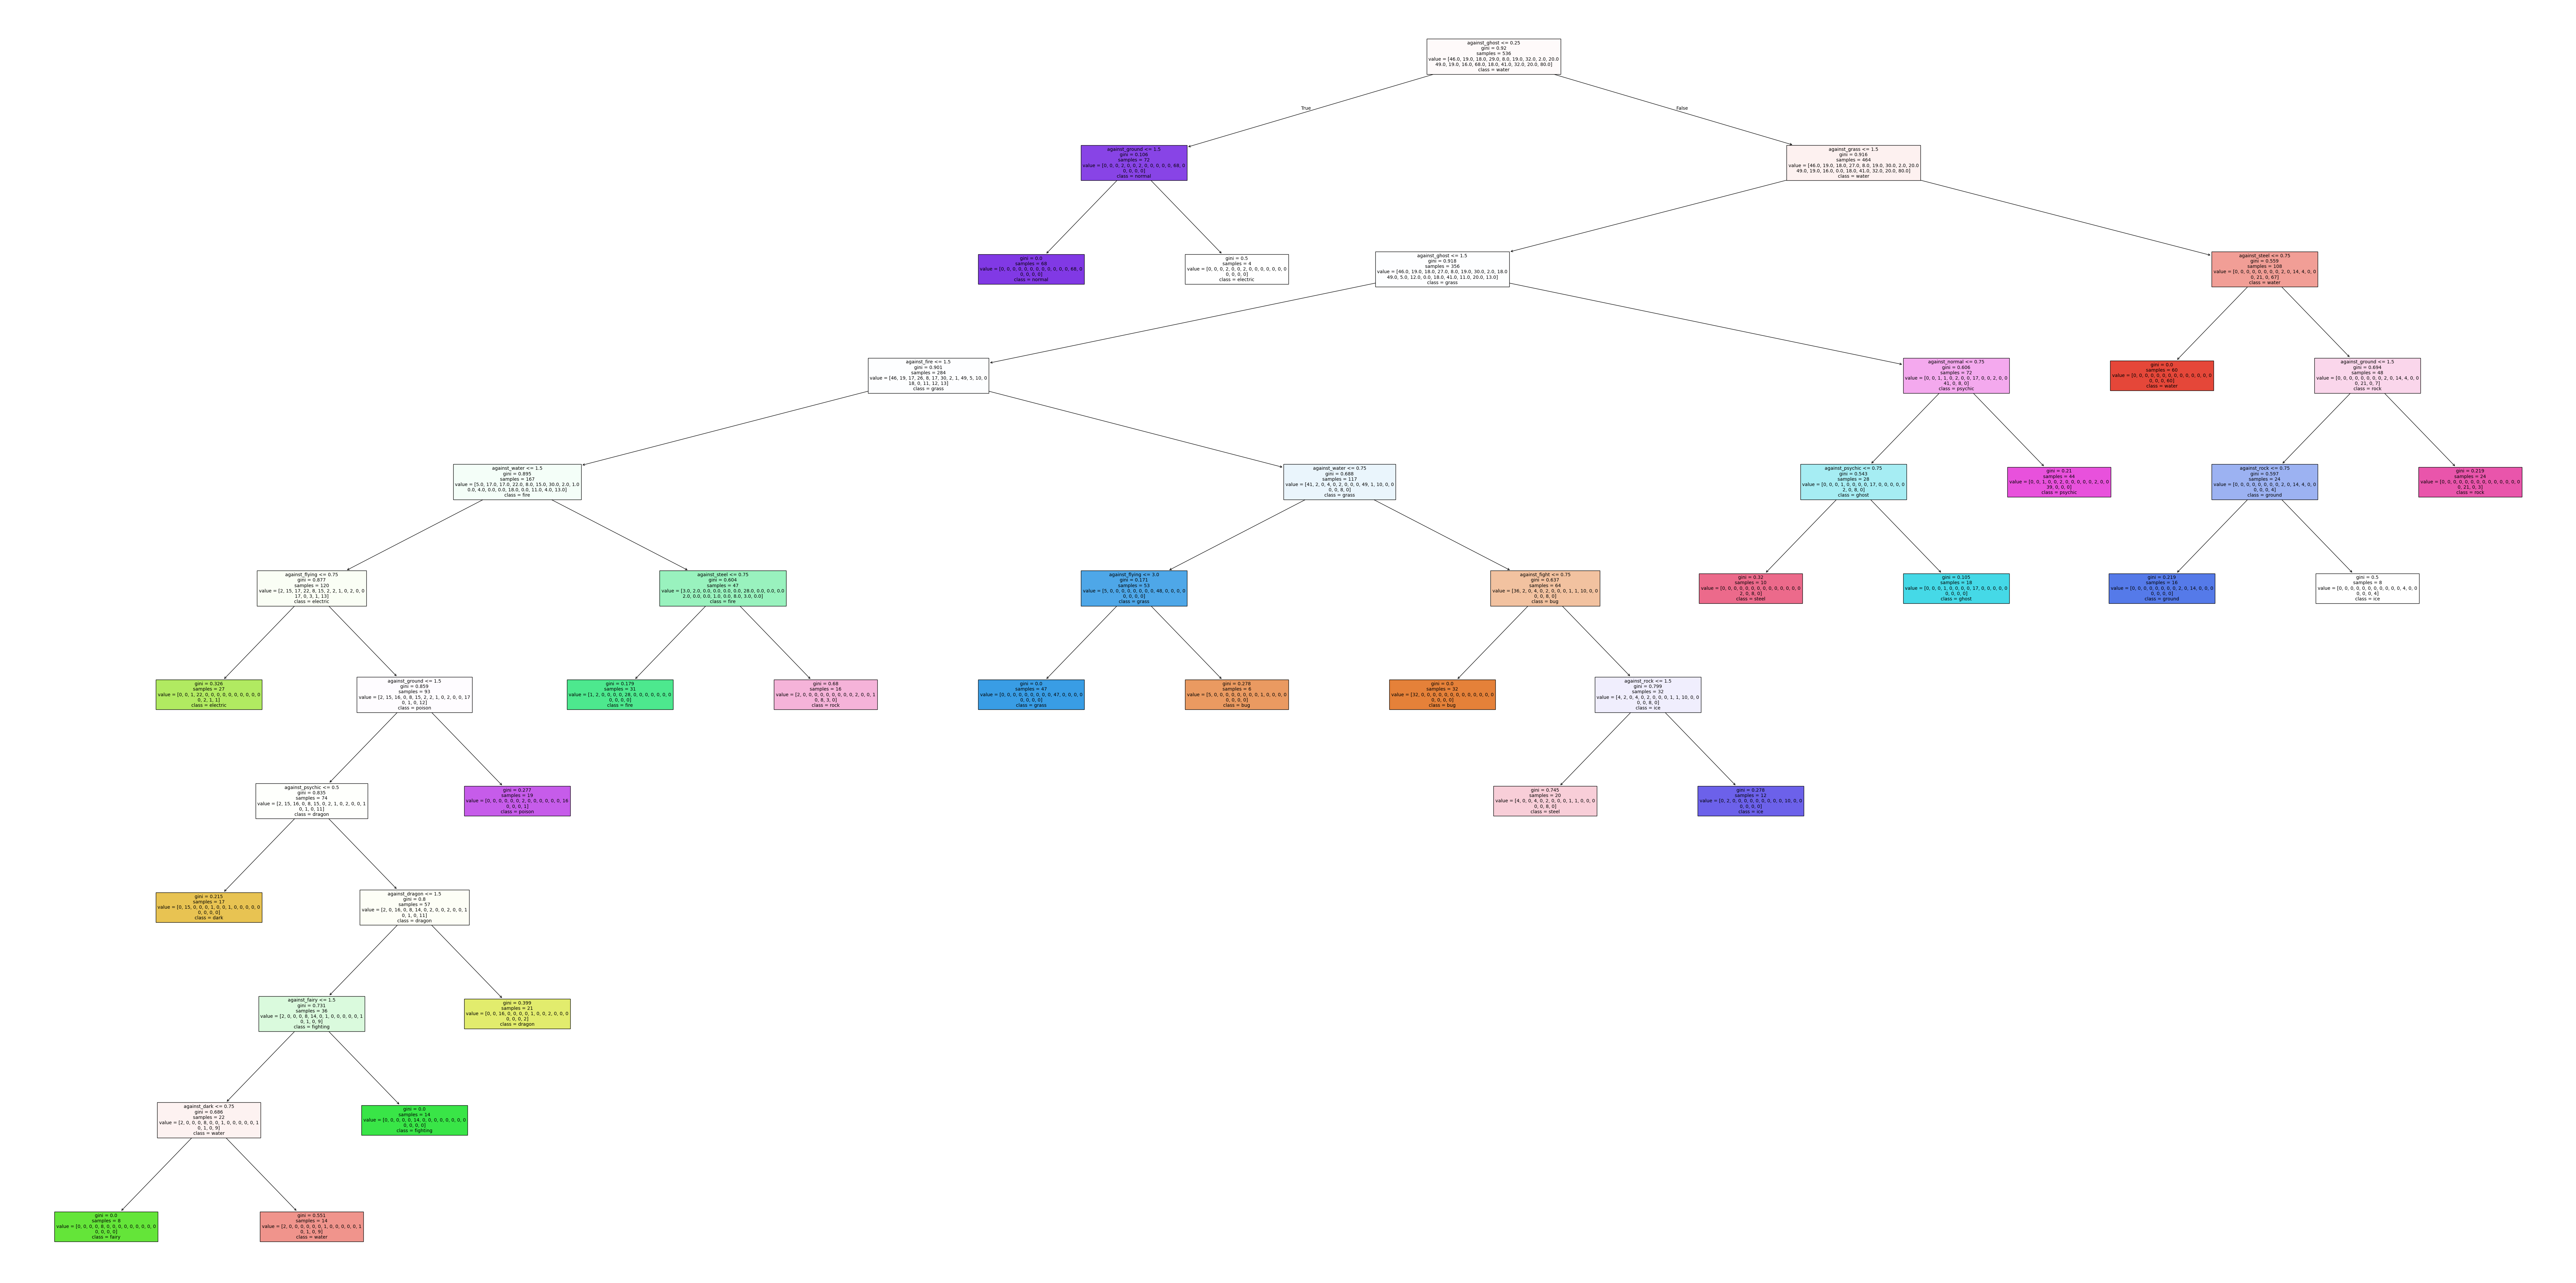

In [333]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize =(100,50))
_ = tree.plot_tree(clf, 
                   feature_names= x.columns, 
                   class_names={0:'bug', 1: 'dark',2: 'dragon', 3:'electric', 4:'fairy', 5:'fighting', 6:'fire', 7:'flying', 8:'ghost', 9:'grass', 10:'ground', 11:'ice', 12:'normal', 13:'poison', 14:'psychic', 15:'rock', 16:'steel', 17:'water'},
                   filled = True,
                   fontsize=10)